<a href="https://colab.research.google.com/github/Bharathdusa/restaurant_reviews_edunet/blob/main/Restautant_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv (1)",delimiter='\t',quoting=3)

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [8]:
df.shape

(1000, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [12]:
df.describe(include="object").T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [15]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [16]:
df['length']=df['Review'].apply(len)

In [18]:
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [19]:
df[df['length']==100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
import string
from nltk.corpus import stopwords

In [22]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [27]:
def text_process(msg):
  nopunc=[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [28]:
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [29]:
df['tokenized_Review']=df['Review'].apply(text_process)

In [30]:
df.head()

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


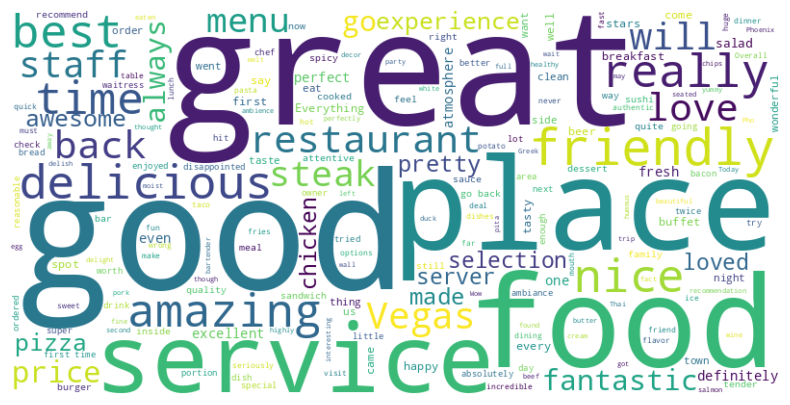

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


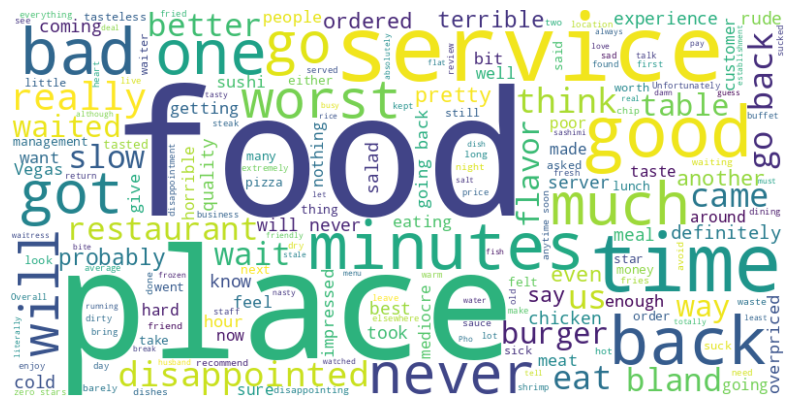

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked']==0,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectorizer=CountVectorizer(max_df=0.9,min_df=10)
x=vectorizer.fit_transform(df['tokenized_Review']).toarray()

In [40]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['tokenized_Review'],df['Liked'],random_state=107,test_size=0.2)

In [42]:
X_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokenized_Review, dtype: object

In [43]:
train_vectorized=vectorizer.transform(X_train)
test_vectorized=vectorizer.transform(X_test)

In [45]:
X_train_array=train_vectorized.toarray()
X_test_array=test_vectorized.toarray()

In [46]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_array,y_train)

GaussianNB()

In [47]:
y_train_preds_nb=nb.predict(X_train_array)
y_test_preds_nb=nb.predict(X_test_array)

In [48]:
y_test_preds_nb

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [49]:
y_test

906    0
24     1
706    1
958    0
355    1
      ..
657    1
754    0
839    1
495    0
804    1
Name: Liked, Length: 200, dtype: int64

In [50]:
pd.DataFrame({"actual_y_value":y_test,"predicted_y_value":y_test_preds_nb})

,actual_y_value,predicted_y_value
906,0,0
24,1,0
706,1,1
958,0,0
355,1,1
...,...,...
657,1,1
754,0,0
839,1,0
495,0,0


In [51]:
from sklearn.metrics import accuracy_score,recall_score, precision_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc,classification_report

In [52]:
def print_metrics(actual,predicted):
  print('accuracy_score is {}'.format(accuracy_score(actual,predicted)))
  print('precision_score is {}'.format(precision_score(actual,predicted)))
  print('recall_score is {}'.format(recall_score(actual,predicted)))
  print('f1_score is {}'.format(f1_score(actual,predicted)))
  print('roc_auc_score is {}'.format(roc_auc_score(actual,predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual,predicted)))
  print('roc_curve is {}'.format(roc_curve(actual,predicted)))
  print('classification_report is {}'.format(classification_report(actual,predicted)))

In [53]:
print_metrics(y_train,y_train_preds_nb)

accuracy_score is 0.76375
precision_score is 0.8403908794788274
recall_score is 0.6482412060301508
f1_score is 0.7319148936170213
roc_auc_score is 0.7631753293832346
confusion_matrix is [[353  49]
 [140 258]]
roc_curve is (array([0.        , 0.12189055, 1.        ]), array([0.        , 0.64824121, 1.        ]), array([2, 1, 0]))
classification_report is               precision    recall  f1-score   support

           0       0.72      0.88      0.79       402
           1       0.84      0.65      0.73       398

    accuracy                           0.76       800
   macro avg       0.78      0.76      0.76       800
weighted avg       0.78      0.76      0.76       800



In [54]:
print_metrics(y_test,y_test_preds_nb)

accuracy_score is 0.725
precision_score is 0.8133333333333334
recall_score is 0.5980392156862745
f1_score is 0.6892655367231638
roc_auc_score is 0.7275910364145659
confusion_matrix is [[84 14]
 [41 61]]
roc_curve is (array([0.        , 0.14285714, 1.        ]), array([0.        , 0.59803922, 1.        ]), array([2, 1, 0]))
classification_report is               precision    recall  f1-score   support

           0       0.67      0.86      0.75        98
           1       0.81      0.60      0.69       102

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.74      0.72      0.72       200



In [57]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
mnv=MultinomialNB()
mnv.fit(X_train_array,y_train)

MultinomialNB()

In [60]:
y_train_preds_mnv=mnv.predict(X_train_array)
y_test_preds_mnv=mnv.predict(X_test_array)

In [62]:
y_test_preds_mnv

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [63]:
print_metrics(y_train,y_train_preds_mnv)

accuracy_score is 0.77
precision_score is 0.8092485549132948
recall_score is 0.7035175879396985
f1_score is 0.7526881720430108
roc_auc_score is 0.7696692417310432
confusion_matrix is [[336  66]
 [118 280]]
roc_curve is (array([0.       , 0.1641791, 1.       ]), array([0.        , 0.70351759, 1.        ]), array([2, 1, 0]))
classification_report is               precision    recall  f1-score   support

           0       0.74      0.84      0.79       402
           1       0.81      0.70      0.75       398

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



In [64]:
print_metrics(y_test,y_test_preds_mnv)

accuracy_score is 0.745
precision_score is 0.7802197802197802
recall_score is 0.696078431372549
f1_score is 0.7357512953367875
roc_auc_score is 0.7459983993597439
confusion_matrix is [[78 20]
 [31 71]]
roc_curve is (array([0.        , 0.20408163, 1.        ]), array([0.        , 0.69607843, 1.        ]), array([2, 1, 0]))
classification_report is               precision    recall  f1-score   support

           0       0.72      0.80      0.75        98
           1       0.78      0.70      0.74       102

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



In [68]:
best_accuracy=0.0
alpha_val=0
for i in np.arange(0.01,1.1,0.1):
  temp_cls=MultinomialNB(alpha=i)
  temp_cls.fit(X_train_array,y_train)
  y_test_pred_h_nbayes=temp_cls.predict(X_test_array)
  score=accuracy_score(y_test,y_test_pred_h_nbayes)
  print("Accuracy Score for alpha-{} is :{}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy=score
    alpha_val=i
print("...................................................................")
print("The Best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(alpha_val,1)))

Accuracy Score for alpha-0.0 is :75.5%
Accuracy Score for alpha-0.1 is :75.5%
Accuracy Score for alpha-0.2 is :75.0%
Accuracy Score for alpha-0.3 is :74.0%
Accuracy Score for alpha-0.4 is :74.5%
Accuracy Score for alpha-0.5 is :74.5%
Accuracy Score for alpha-0.6 is :74.5%
Accuracy Score for alpha-0.7 is :74.5%
Accuracy Score for alpha-0.8 is :74.5%
Accuracy Score for alpha-0.9 is :74.5%
Accuracy Score for alpha-1.0 is :74.5%
...................................................................
The Best accuracy is 75.5% with alpha value as 0.0
